In [1]:
import torch
import torchaudio
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [2]:
signal_spec = torch.load('/home/guy/PycharmProjects/Acoustic_Locating_VQ-VAE/rir_dataset_generator/1.pt')
print(signal_spec)

[[[  0   1   1 ...  35  43  43]
  [  0   1   3 ...  36  44  39]
  [  5  27  22 ...  33  36  54]
  ...
  [ 16   8   5 ...  10  35 268]
  [  7   7 107 ...   5  18 172]
  [  7  32   5 ...  15  14  49]]]


In [3]:
C = 340
fs = 16e3
receiver_position = [2, 1.5, 1.5]
room_dimensions = [4, 5, 3]
reverberation_time = 0.4
n_sample = int(reverberation_time * fs)
R = 1
DATASET_SIZE = 10
NFFT = int(fs * 0.025)
HOP_LENGTH = int(fs * 0.01)


audio_transformer = torchaudio.transforms.InverseSpectrogram(n_fft=NFFT, hop_length=HOP_LENGTH,
                                                      center=True, pad=0, normalized=True)

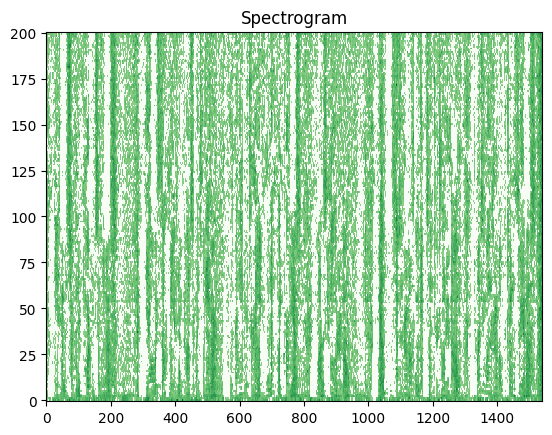

In [7]:
_, ax = plt.subplots(1, 1)
ax.imshow(librosa.power_to_db(signal_spec.squeeze()), origin="lower", aspect="auto", interpolation="nearest", cmap='Greens')
ax.set_title("Spectrogram")
plt.show()

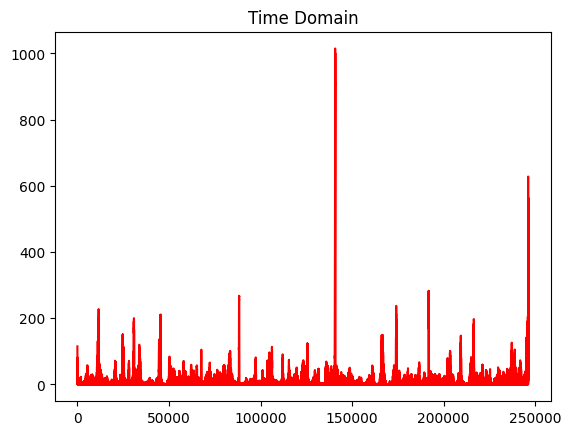

In [5]:
signal_td = audio_transformer(torch.from_numpy(signal_spec.astype(complex)))
plt.plot(range(signal_td.shape[1]),np.abs(signal_td).T, color="red")
plt.title("Time Domain")
plt.show()

In [6]:
import scipy.io.wavfile as wav_f

rate = fs
data = signal_td
scaled = np.float64(data / np.max(np.abs(data.numpy())) * 32767)
wav_f.write('test.wav', int(rate), scaled.astype(np.int16).squeeze())